# Testing Toy Dataset Generation

In [116]:
%load_ext autoreload
%autoreload 2

# System imports
import os
import sys
import yaml

# External imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

import torch
from torch_geometric.data import Data
from torch.utils.data import DataLoader, Dataset
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger, WandbLogger
import scipy as sp
import wandb

import warnings

warnings.filterwarnings("ignore")
sys.path.append("../")
device = "cuda" if torch.cuda.is_available() else "cpu"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
from models.generation_utils import generate_toy_dataset

In [118]:
dataset_config = {
    'num_events': 1,
    'num_tracks': 100,
    'track_dis_width': 0,
    'num_layers': 10,
    'min_r': 0.1,
    'max_r': 0.5,
    'detector_width': 0.5,
    'ptcut': 1,
    'eff': 1.0,
    'pur': 0.01,
}

In [119]:
dataset = generate_toy_dataset(**dataset_config)

In [120]:
sample = dataset[0]

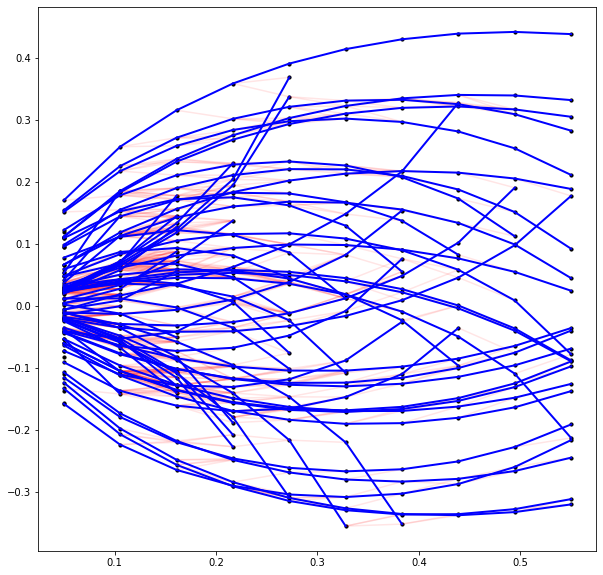

In [121]:
# Plot the graph
def plot_graph(sample):
    truth_mask = sample.y == 1
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(sample.x[:,0], sample.x[:,1], s=10, c="k")
    ax.plot(sample.x[sample.edge_index[:,~truth_mask],0], sample.x[sample.edge_index[:,~truth_mask],1], c='r', alpha=0.1)
    ax.plot(sample.x[sample.edge_index[:,truth_mask],0], sample.x[sample.edge_index[:,truth_mask],1], c='b', alpha=1, linewidth=2)
    plt.show()

plot_graph(sample)

In [115]:
sample.y.sum() / sample.y.shape[0]

tensor(0.2338)